## Storage Containers for Seven Day Predictions and Model comparision/

In [72]:
sevenday=[]
arrcomp1=[]

## Importing Dataset and required Library files

In [202]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
df = pd.read_csv("Bitcoin.csv");
print(df)

           Date    Price     Open     High      Low  Change %
0     1/18/2011      0.3      0.3      0.3      0.3      0.00
1     1/19/2011      0.3      0.3      0.3      0.3      0.00
2     1/20/2011      0.4      0.3      0.4      0.3     24.60
3     1/21/2011      0.4      0.4      0.4      0.4      0.00
4     1/22/2011      0.4      0.4      0.4      0.4      0.00
...         ...      ...      ...      ...      ...       ...
4995  9/21/2024  63348.1  63201.2  63526.3  62778.6      0.23
4996  9/22/2024  63572.7  63351.2  63998.2  62394.6      0.35
4997  9/23/2024  63331.8  63575.4  64723.4  62650.0     -0.38
4998  9/24/2024  64256.8  63335.9  64664.1  62740.8      1.46
4999  9/25/2024  63156.5  64262.9  64788.4  62952.8     -1.71

[5000 rows x 6 columns]


## Code to clean and convert the feature into floats.

In [ ]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df =df.drop(['Vol.'] ,axis = 1)
df.dtypes

## # Plotting the closing prices of cryptocurrency over the time

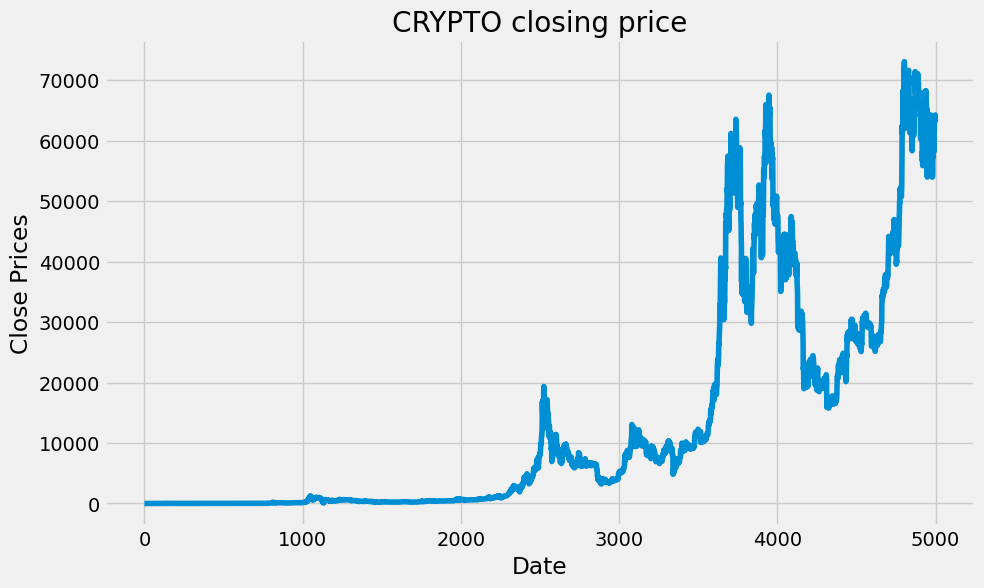

In [203]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Price'])
plt.title('CRYPTO closing price')
plt.show()

<Axes: ylabel='Density'>

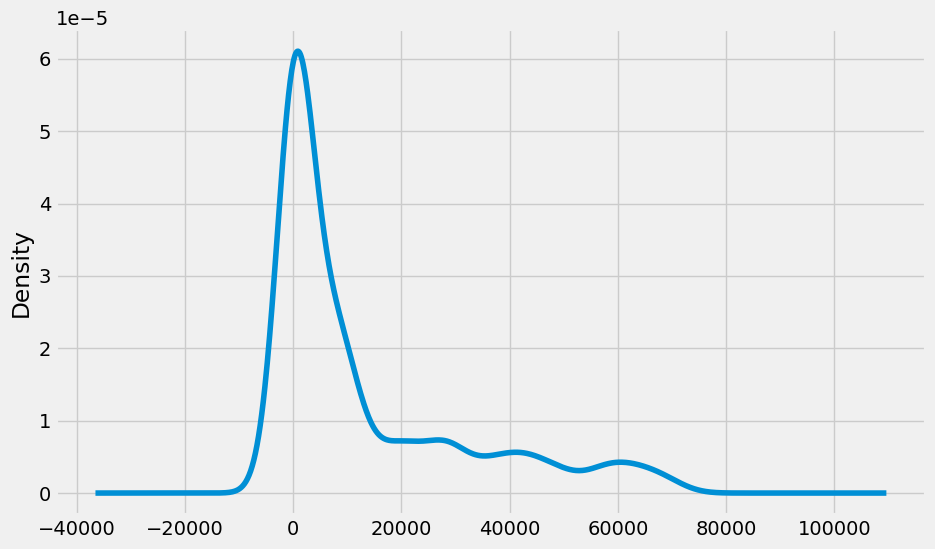

In [204]:
df['Price'].plot(kind='kde')

## Ploting the Mean and Statndard deviation to understand the volality nature of prices

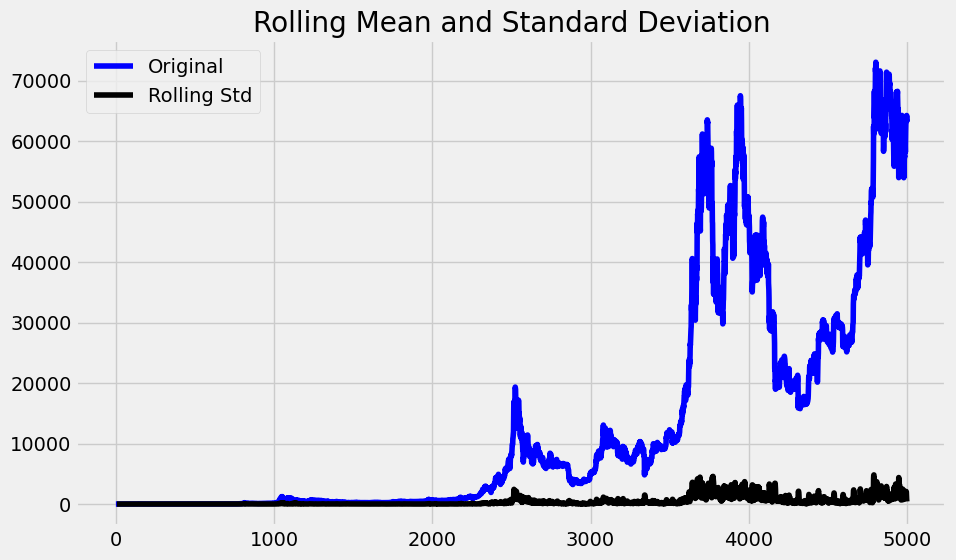

In [205]:
rolstd = df['Price'].rolling(7).std()
plt.plot(df['Price'], color='blue',label='Original')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)
    

<Axes: ylabel='Density'>

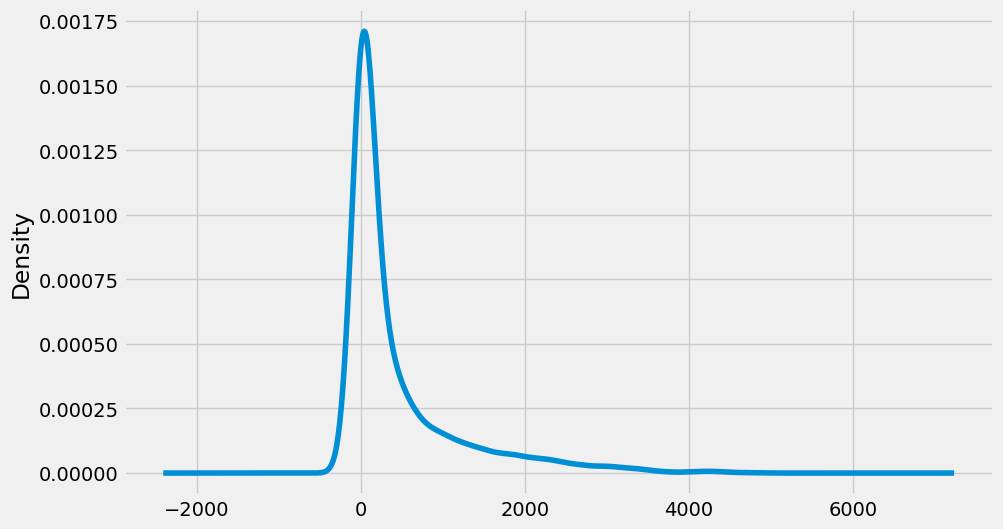

In [206]:
rolstd.plot(kind='kde')

## Code to plot the Lorenze Curve based on the perdcition ahead value.

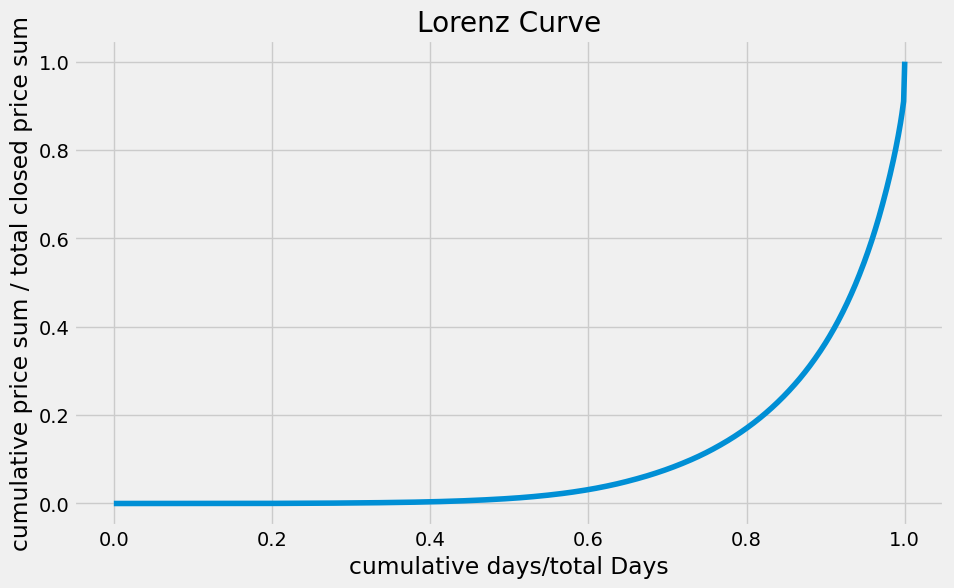

In [207]:
noofdays = 7
mv=df.copy()
mv['Price'] = mv['Price'].shift(-noofdays)
mv.fillna(0, inplace=True)
Closed_price= mv['Price']
Close_price=[];
Closed_diff =[]
for i in range((len(Closed_price)-noofdays)):
    j=abs(Closed_price[i+noofdays] - Closed_price[i])
    Closed_diff.append(j)
kval=[]


j =0
for i in Closed_price:
    Close_price.append(i)
for i in range(0,len(Close_price),1 ):
        lis=Closed_diff[:i]       
        kval.append(lis)
        j =i

sum1 =0;
total_sum =0;
y_axis=[]
for i in Closed_diff:
    total_sum+= i;
    
    
    
Closed_diff.sort()
y_axis=[]


n = len(Closed_diff)
x_axis=[]
count=0
for  i in Closed_diff:
    sum1+= i
    count+=1
    y_axis.append(sum1/total_sum);
    x_axis.append(count/n);
plt.title("Lorenz Curve");
plt.xlabel('cumulative days/total Days')
plt.ylabel('cumulative price sum / total closed price sum')
plt.plot(x_axis,y_axis)

## Code to calculate Gini Index and K value

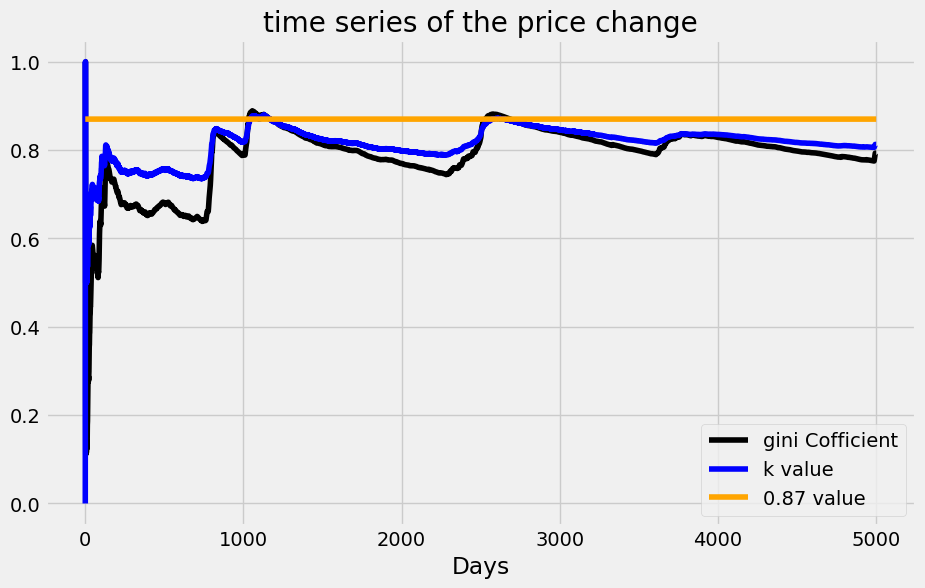

In [209]:
ginilis=[]
kvlist=[]
lenval=[]
val87=[]
count=0

def lorenz(x):
    y_axis=[]
    x.sort()
    n = len(x)
    x_axis=[]
    count=0
    sum1 =0
    total_sum =0;
    for i in x:
        total_sum+= i;
    for  i in x:
        sum1+= i
        count+=1
        y_axis.append(sum1/total_sum);
        x_axis.append(count/n);
    return x_axis,y_axis
def kv(x):
    diff=[]
    value=0
    x_axis1 , y_axis1 = lorenz(x);
    for i in range(len(x)):
        d=(1-x_axis1[i]) - y_axis1[i] 
        if(d < 0 ):
            value= (x_axis1[i-1] + x_axis1[i])/2
            break;
        diff.append(d)
    return value;
    
def gini(x):
    sum2 =0
    x_axis1 , y_axis1 = lorenz(x);
    for i in range(len(x)-1):
        sum2 = sum2+((( y_axis1[i+1]+  y_axis1[i] )/2)*(x_axis1[i+1]-x_axis1[i]))
    ginival =1- (2 * sum2)
    return ginival
for i in kval:
    count +=1
    ginilis.append(gini(i))
    kvlist.append(kv(i))
    val87.append(0.87)
    lenval.append(count)

df['Gini'] = ginilis
df['Kvalue']= kvlist
df.to_csv("Bitcoin_.csv", index=False)
plt.xlabel('Days')
plt.plot(lenval,ginilis,color="Black",label="gini Cofficient")
plt.plot(lenval,kvlist,color="Blue",label="k value")
plt.plot(lenval,val87,color="orange",label="0.87 value")
plt.legend(loc='best')
plt.title("time series of the price change")
plt.show(block=False)

## Code to calculae Statistical Measures 

In [211]:
ar=[]
path ="Bitcoin.csv"
def skewness(df,path):
    x = df['Price'].rolling(window=5).skew()
    x=x.tolist()
    x=x[4:]+x[:4]
    return x
def standard(df,path):
    sma = df['Price'].rolling(window=5).std()
    sma=sma.tolist()
    sma=sma[4:]+sma[:4]
    return sma;
def kuritosis(df,path):
    y =df['Price'].rolling(window=5).kurt()
    y=y.tolist()
    y=y[4:]+y[:4]
    df["Kurtosis"] = y
    return y;
    
standard(df,path)
skewness(df,path)
kuritosis(df,path)
Dict = {"Skewness": skewness(df,path), "Standard_Deviation": standard(df,path), "Kurtosis": kuritosis(df,path)}

In [212]:
df11=pd.DataFrame.from_dict(Dict)

## KNN Imputer

In [213]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df11),columns = df11.columns)

## Readjusting cloumns to intputs and output features to divede into train and test split

In [214]:
df['Standard_Deviation']=df2['Standard_Deviation']
df['Skewness']=df2['Skewness']
df['Kurtosis']=df2['Kurtosis']
df.to_csv("Bitcoin.csv",index='Date')

In [215]:
df1 = df
df1 = df1.dropna()
df1

,Date,Price,Open,High,Low,Change %,Gini,Kvalue,Kurtosis,Standard_Deviation,Skewness
0,1/18/2011,0.3,0.3,0.3,0.3,0.00,1.000000,0.000000,-3.333333,0.054772,9.682495
1,1/19/2011,0.3,0.3,0.3,0.3,0.00,1.000000,1.000000,5.000000,0.044721,8.751259
2,1/20/2011,0.4,0.3,0.4,0.3,24.60,0.250000,0.750000,-3.000000,0.000000,0.000000
3,1/21/2011,0.4,0.4,0.4,0.4,0.00,0.111111,0.500000,-3.000000,0.000000,0.000000
4,1/22/2011,0.4,0.4,0.4,0.4,0.00,0.115385,0.625000,-3.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4995,9/21/2024,63348.1,63201.2,63526.3,62778.6,0.23,0.792951,0.812638,2.797275,430.663461,1.622393
4996,9/22/2024,63572.7,63351.2,63998.2,62394.6,0.35,0.792951,0.812638,0.013714,376.383173,-0.033462
4997,9/23/2024,63331.8,63575.4,64723.4,62650.0,-0.38,0.792951,0.812638,0.013714,376.383173,-0.033462
4998,9/24/2024,64256.8,63335.9,64664.1,62740.8,1.46,0.792951,0.812638,0.013714,376.383173,-0.033462


In [216]:
cols = df1.columns.tolist()
cols=cols[0:1]+cols[2:]+cols[1:2]
df1 = df1[cols]
df1

,Date,Open,High,Low,Change %,Gini,Kvalue,Kurtosis,Standard_Deviation,Skewness,Price
0,1/18/2011,0.3,0.3,0.3,0.00,1.000000,0.000000,-3.333333,0.054772,9.682495,0.3
1,1/19/2011,0.3,0.3,0.3,0.00,1.000000,1.000000,5.000000,0.044721,8.751259,0.3
2,1/20/2011,0.3,0.4,0.3,24.60,0.250000,0.750000,-3.000000,0.000000,0.000000,0.4
3,1/21/2011,0.4,0.4,0.4,0.00,0.111111,0.500000,-3.000000,0.000000,0.000000,0.4
4,1/22/2011,0.4,0.4,0.4,0.00,0.115385,0.625000,-3.000000,0.000000,0.000000,0.4
...,...,...,...,...,...,...,...,...,...,...,...
4995,9/21/2024,63201.2,63526.3,62778.6,0.23,0.792951,0.812638,2.797275,430.663461,1.622393,63348.1
4996,9/22/2024,63351.2,63998.2,62394.6,0.35,0.792951,0.812638,0.013714,376.383173,-0.033462,63572.7
4997,9/23/2024,63575.4,64723.4,62650.0,-0.38,0.792951,0.812638,0.013714,376.383173,-0.033462,63331.8
4998,9/24/2024,63335.9,64664.1,62740.8,1.46,0.792951,0.812638,0.013714,376.383173,-0.033462,64256.8


In [217]:
df1.dtypes

Date                   object
Open                  float64
High                  float64
Low                   float64
Change %              float64
Gini                  float64
Kvalue                float64
Kurtosis              float64
Standard_Deviation    float64
Skewness              float64
Price                 float64
dtype: object

## Splitting the Leveraged dataset into train and Test (70% and 30%)

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
x = df1.iloc[:, 1:10]
y = df1.iloc[:, 10:]
x

,Open,High,Low,Change %,Gini,Kvalue,Kurtosis,Standard_Deviation,Skewness
0,0.3,0.3,0.3,0.00,1.000000,0.000000,-3.333333,0.054772,9.682495
1,0.3,0.3,0.3,0.00,1.000000,1.000000,5.000000,0.044721,8.751259
2,0.3,0.4,0.3,24.60,0.250000,0.750000,-3.000000,0.000000,0.000000
3,0.4,0.4,0.4,0.00,0.111111,0.500000,-3.000000,0.000000,0.000000
4,0.4,0.4,0.4,0.00,0.115385,0.625000,-3.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
4995,63201.2,63526.3,62778.6,0.23,0.792951,0.812638,2.797275,430.663461,1.622393
4996,63351.2,63998.2,62394.6,0.35,0.792951,0.812638,0.013714,376.383173,-0.033462
4997,63575.4,64723.4,62650.0,-0.38,0.792951,0.812638,0.013714,376.383173,-0.033462
4998,63335.9,64664.1,62740.8,1.46,0.792951,0.812638,0.013714,376.383173,-0.033462


In [220]:
df

,Date,Price,Open,High,Low,Change %,Gini,Kvalue,Kurtosis,Standard_Deviation,Skewness
0,1/18/2011,0.3,0.3,0.3,0.3,0.00,1.000000,0.000000,-3.333333,0.054772,9.682495
1,1/19/2011,0.3,0.3,0.3,0.3,0.00,1.000000,1.000000,5.000000,0.044721,8.751259
2,1/20/2011,0.4,0.3,0.4,0.3,24.60,0.250000,0.750000,-3.000000,0.000000,0.000000
3,1/21/2011,0.4,0.4,0.4,0.4,0.00,0.111111,0.500000,-3.000000,0.000000,0.000000
4,1/22/2011,0.4,0.4,0.4,0.4,0.00,0.115385,0.625000,-3.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4995,9/21/2024,63348.1,63201.2,63526.3,62778.6,0.23,0.792951,0.812638,2.797275,430.663461,1.622393
4996,9/22/2024,63572.7,63351.2,63998.2,62394.6,0.35,0.792951,0.812638,0.013714,376.383173,-0.033462
4997,9/23/2024,63331.8,63575.4,64723.4,62650.0,-0.38,0.792951,0.812638,0.013714,376.383173,-0.033462
4998,9/24/2024,64256.8,63335.9,64664.1,62740.8,1.46,0.792951,0.812638,0.013714,376.383173,-0.033462


In [221]:
train=df1.iloc[:4000]
test=df1.iloc[4001:]
x_train = train.iloc[:, 1:10]
y_train = train.iloc[:, 10:]
x_test = test.iloc[:, 1:10]
y_test = test.iloc[:, 10:]

In [222]:
x_test

,Open,High,Low,Change %,Gini,Kvalue,Kurtosis,Standard_Deviation,Skewness
4001,46217.5,47917.6,46217.5,3.29,0.828396,0.835166,1.607804,1693.260769,-1.253387
4002,47738.7,47944.9,46718.2,-0.89,0.828277,0.835207,-2.641596,1867.154933,-0.268759
4003,47293.9,47556.0,45704.0,-1.86,0.828164,0.834999,-1.888251,2026.174137,0.076977
4004,46435.7,47505.4,45602.1,-1.28,0.828119,0.835040,0.990573,1735.633340,1.060777
4005,45833.1,47019.4,42535.1,-5.26,0.828075,0.834831,-2.789144,875.771147,0.620773
...,...,...,...,...,...,...,...,...,...
4995,63201.2,63526.3,62778.6,0.23,0.792951,0.812638,2.797275,430.663461,1.622393
4996,63351.2,63998.2,62394.6,0.35,0.792951,0.812638,0.013714,376.383173,-0.033462
4997,63575.4,64723.4,62650.0,-0.38,0.792951,0.812638,0.013714,376.383173,-0.033462
4998,63335.9,64664.1,62740.8,1.46,0.792951,0.812638,0.013714,376.383173,-0.033462


## Run Only Once ( To have the last column as the input from which we will predict the output as the future price for upcoming days)

In [65]:
test1 = df1.iloc[4999:]
test1

,Date,Open,High,Low,Change %,Gini,Kvalue,Kurtosis,Standard_Deviation,Skewness,Price
4999,9/25/2024,64262.9,64788.4,62952.8,-1.71,0.798419,0.816663,0.013714,376.383173,-0.033462,63156.5


In [66]:
x_test1 = test1.iloc[:, 1:10]
y_test1 = test1.iloc[:, 10:]

In [67]:
arrcomp=[]

# Start of Training of ML models

## Random Foresrt Regressor

R2 Score Value: 0.9941799102758762
Mean Squared Error: 1547315.9240524005


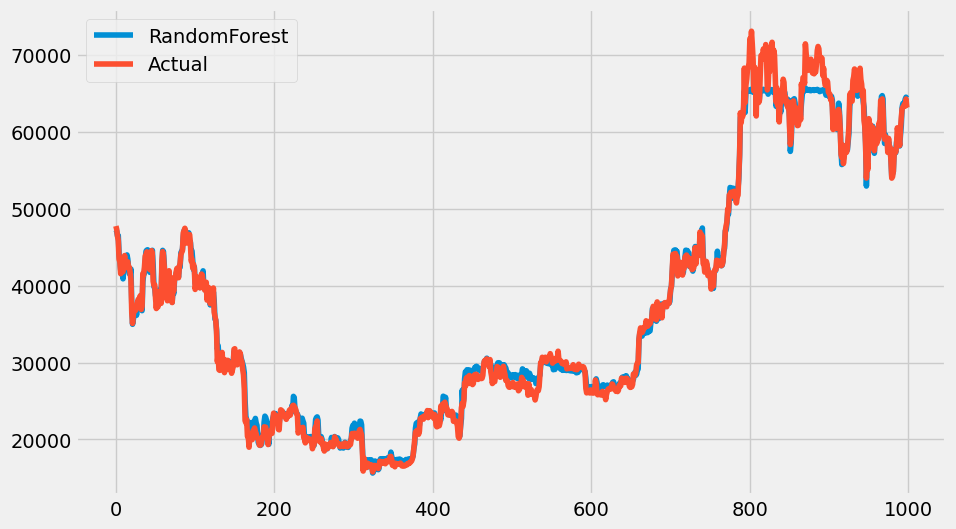

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train.values.ravel())
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)
arrcomp.append(r2)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score Value:", r2)
arrcomp1.append(r2)
print("Mean Squared Error:", mse)
arr = y_test['Price'].to_numpy()
dic = {"ytest": arr, "ypred": y_pred}
df_comparison = pd.DataFrame.from_dict(dic)
plt.plot(y_pred, label="RandomForest")
plt.plot(arr, label="Actual")
y_pred_other_algorithm = np.random.rand(len(y_pred)) 
plt.legend()
plt.show()

## Linear Regression


R2 Score: 0.9993041683161177
Mean Squared Error: 184992.2416949233


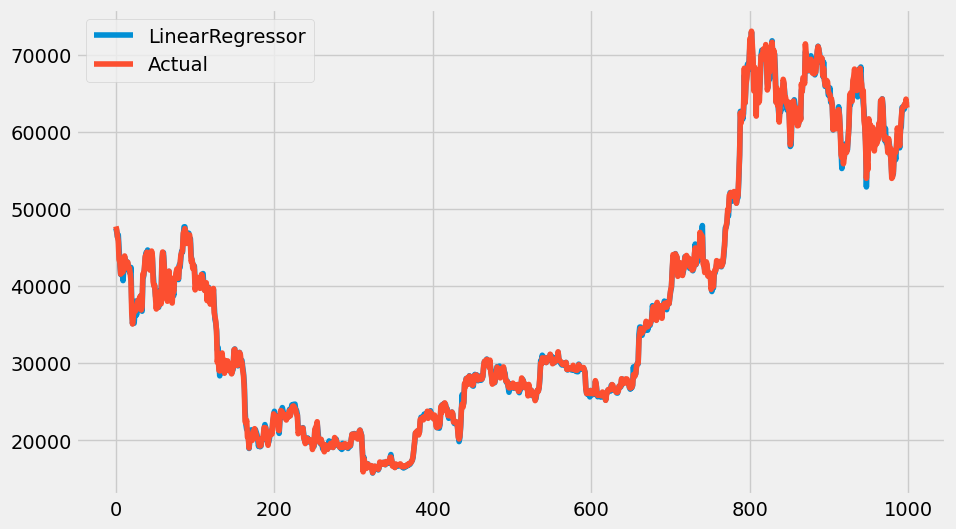

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("R2 Score:", r2_score(y_test, y_pred))
arrcomp.append(r2_score(y_test, y_pred))
c = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", c)
arr = y_test['Price'].to_numpy()
arr1 = [i[0] for i in y_pred]
df00 = pd.DataFrame.from_dict(dic)
plt.plot(arr1, label="LinearRegressor")
plt.plot(arr, label="Actual")
y_pred_other_algorithm = np.random.rand(len(arr1))
plt.legend()
plt.show()

## Predicting the Future Value (Using Linear Regression Model)

In [224]:
y_pred1 = regr.predict(x_test1)
y_pred1

array([[63587.14147391]])

In [225]:
sevenday.append(y_pred1)

## Plotting the Seven Day Future Prices using the Linear Regression Model

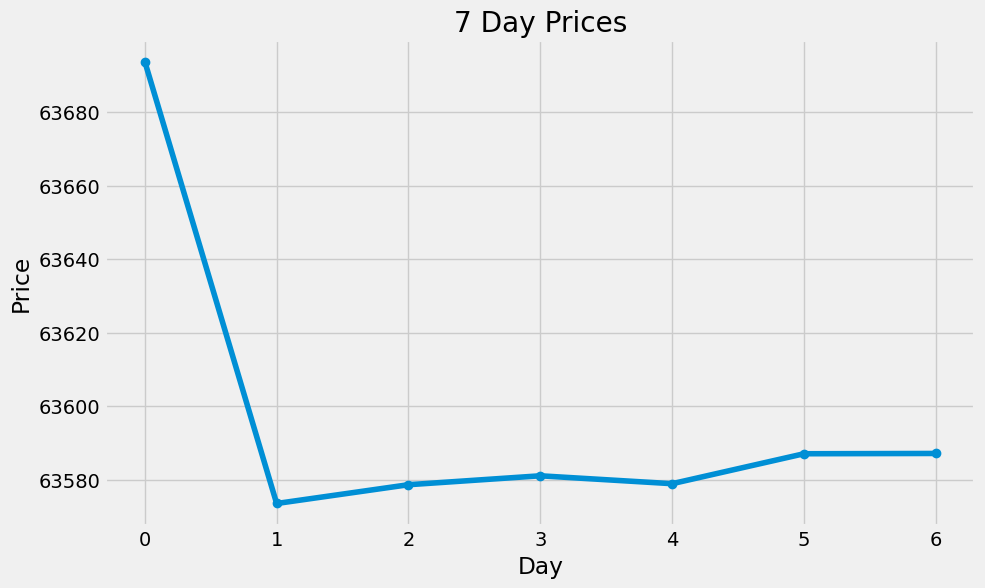

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
prices = [arr.flatten()[0] for arr in sevenday]
plt.plot(prices, marker='o')
plt.title('7 Day Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## Decision Tree

R2 Score: 0.9905051309027378
Mean Squared Error: 2524284.4779679687


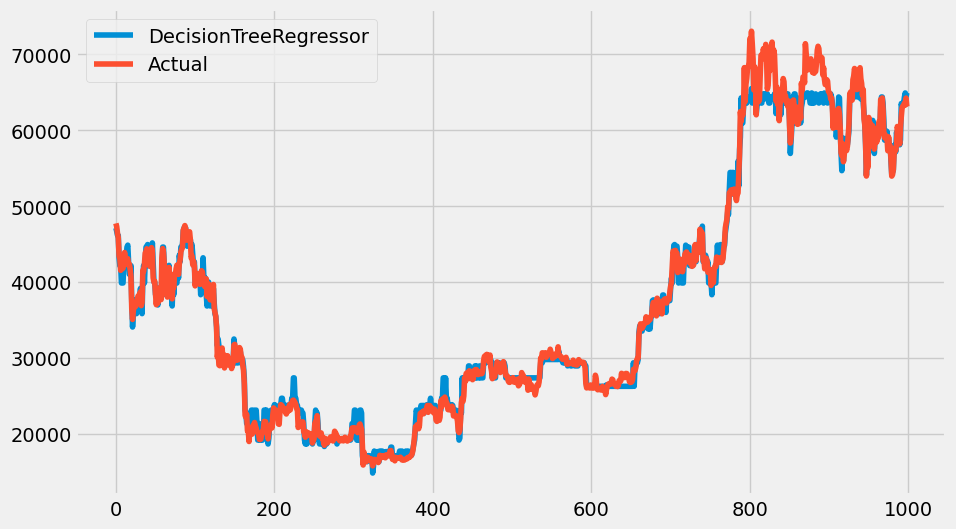

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
regr = DecisionTreeRegressor(random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("R2 Score:", r2_score(y_test, y_pred))
arrcomp.append(r2_score(y_test, y_pred))
c = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", c)
arr = y_test['Price'].to_numpy()
arr1 = [i for i in y_pred]
dic = {"ytest": arr, "ypred": arr1}
df00 = pd.DataFrame.from_dict(dic)
plt.plot(arr1, label="DecisionTreeRegressor")
plt.plot(arr, label="Actual")
y_pred_other_algorithm = np.random.rand(len(arr1))  
plt.legend()
plt.show()

## KNN Regressor

R2 Score: 0.9936878707487107
Mean Squared Error: 1678128.4427135154


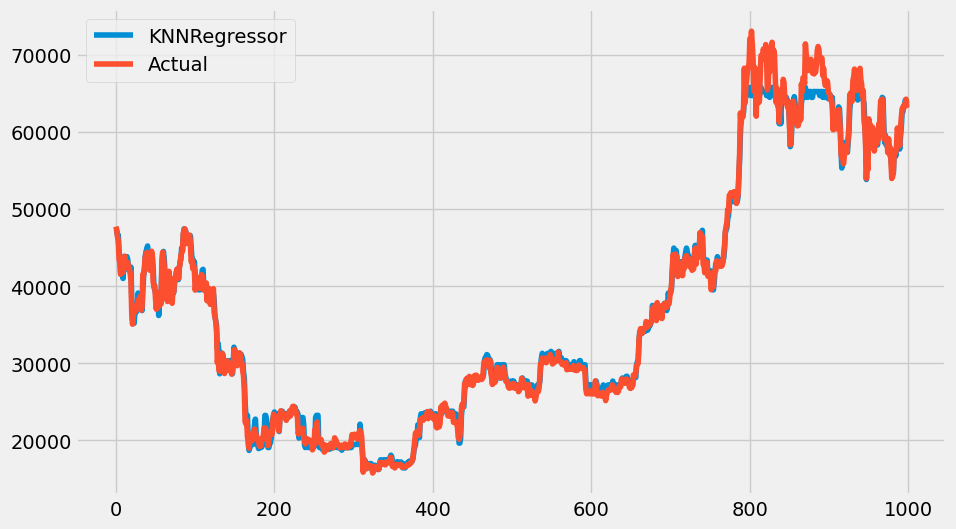

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
regr = KNeighborsRegressor(n_neighbors=5)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("R2 Score:", r2_score(y_test, y_pred))
arrcomp.append(r2_score(y_test, y_pred))
c = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", c)
arr = y_test['Price'].to_numpy()
arr1 = [i for i in y_pred]
dic = {"ytest": arr, "ypred": arr1}
df00 = pd.DataFrame.from_dict(dic)
plt.plot(arr1, label="KNNRegressor")
plt.plot(arr, label="Actual")
plt.legend()
plt.show()

In [41]:
print(arrcomp)

[0.9941799102758762, 0.999304251004978, 0.9905051309027378, 0.9936878707487107]


## Comparison Of the Algorithms 

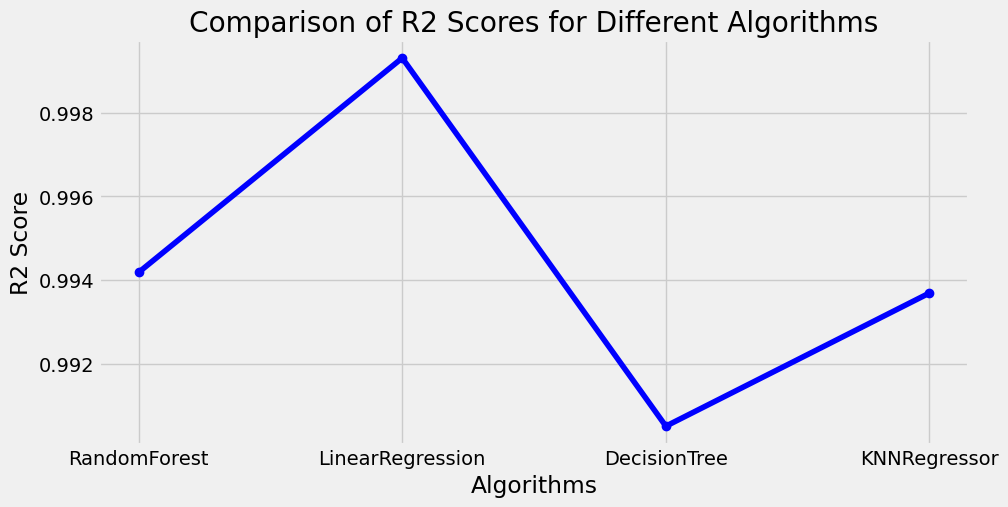

In [42]:
import matplotlib.pyplot as plt
algorithms = ["RandomForest", "LinearRegression", "DecisionTree", "KNNRegressor"]
plt.figure(figsize=(10, 5))
plt.plot(algorithms, arrcomp, marker='o', linestyle='-', color='b')
plt.xlabel('Algorithms')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Algorithms')
plt.grid(True)
plt.show()